# Предобработка 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import utils

data_dir = 'data'

## Embroteka

- чистка поля name
- чистка поля category
- отбор по полю local_image_path_1

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'embroteka.csv'))

# берем только картинки, пути которых содержатся в local_image_path_1
columns = ['name', 'url', 'category', 'local_image_path_1']
df = df[columns].copy()

# обработка текстовых колонок
df['local_image_path_1'] = df['local_image_path_1'].map(lambda row: os.path.join(data_dir, row))
df['name'] = df['name'].map(lambda row: utils.clean_embroteka_text(row))
df['category'] = df['category'].map(lambda row: utils.clean_embroteka_text(row))
df['text'] = df['name'] + ' ' + df['category']
df.rename(columns={'local_image_path_1': 'local_image_path'}, inplace=True)

# сохранение получившегося набора
df = df[['local_image_path', 'name', 'category', 'text', 'url']].reset_index(names='id')
df.to_csv(os.path.join(data_dir, 'embroteka_clean.csv'), index=False)

## Royal Present

- чистка поля name
- чистка поля category
- отбор и разворачивание по полям local_image_path_1, local_image_path_2

In [ ]:
# чтение и отбор нужных колонок
df = pd.read_csv(os.path.join(data_dir, 'royal_present.csv'))
columns = ['name', 'url', 'category', 
           'local_image_path_1', 'local_image_path_2']
df = df[columns].reset_index(names='id').copy()

# обработка текстовых полей
df['name'] = df['name'].map(lambda row: utils.clean_royal_text(row))
df['category'] = df['category'].map(lambda row: utils.clean_royal_text(row))
df['text'] = df['name'] + ' ' + df['category']
df = pd.melt(df, 
             id_vars=['id', 'url', 'name', 'category', 'text'], 
             value_vars=['local_image_path_1', 'local_image_path_2'],
             value_name='local_image_path')
df = df.drop(columns='variable').sort_values(by=['id', 'local_image_path']).dropna()
df['local_image_path'] = df['local_image_path'].map(lambda row: os.path.join(data_dir, row))
df['id'] = range(len(df))

# сохранение
df = df[['id', 'local_image_path', 'name', 'category', 'text', 'url']]
df.to_csv(os.path.join(data_dir, 'royal_present_clean.csv'), index=False)

# Слияние данных

Объединим наборы данных, собранных с двух различных сайтов. Итого у нас получилось 21126 точек данных.

In [13]:
df_1 = pd.read_csv(os.path.join(data_dir, 'embroteka_clean.csv'))
df_2 = pd.read_csv(os.path.join(data_dir, 'royal_present_clean.csv'))
df = pd.concat([df_1, df_2]).drop(columns='id')
df['id'] = range(len(df))
df.to_csv(os.path.join(data_dir, 'total_data_clean.csv'), index=False)

In [14]:
print('Итоговый размер датафрейма:', df.shape)
df.head()

Итоговый размер датафрейма: (21126, 6)


,local_image_path,name,category,text,url,id
0,data/embroteka_imgs/0.png,baby tom,астрология космос кино мульты аниме игры,baby tom астрология космос кино мульты аниме игры,https://embroteka.ru/baby-tom-16926,0
1,data/embroteka_imgs/1.png,behind,астрология космос кино мульты аниме игры,behind астрология космос кино мульты аниме игры,https://embroteka.ru/behind,1
2,data/embroteka_imgs/2.png,eren x nike logo,астрология космос кино мульты аниме игры,eren x nike logo астрология космос кино мульты...,https://embroteka.ru/erennike-logo,2
3,data/embroteka_imgs/3.png,hello kitty nike,астрология космос логотипы гербы шевроны,hello kitty nike астрология космос логотипы ге...,https://embroteka.ru/hello-kitty-nike,3
4,data/embroteka_imgs/4.png,nike x kapibara найк х капибара,астрология космос логотипы гербы шевроны,nike x kapibara найк х капибара астрология кос...,https://embroteka.ru/nike-kapibara,4


# Разделение на train и test

Зафиксируем обучающую и тестовую выборки для будущих экспериментов.

In [ ]:
# случайно перемешаем датафрейм и отправим 5000 примеров в тестовую выборку, а остальные - в обучающую
test_size = 5000
shuffled_df = df.sample(frac=1)
test_df = shuffled_df[:test_size]
train_df = shuffled_df[test_size:]

In [ ]:
# сохранение наборов
train_df.to_csv(os.path.join(data_dir, 'train_data.csv'), index=False)
test_df.to_csv(os.path.join(data_dir, 'test_data.csv'), index=False)

# Примеры данных

In [4]:
df = pd.read_csv('data/total_data_clean.csv')
df.head()

,id,local_image_path,name,category,text,url
0,0,data/embroteka_imgs/0.png,baby tom,астрология космос кино мульты аниме игры,baby tom астрология космос кино мульты аниме игры,https://embroteka.ru/baby-tom-16926
1,1,data/embroteka_imgs/1.png,behind,астрология космос кино мульты аниме игры,behind астрология космос кино мульты аниме игры,https://embroteka.ru/behind
2,2,data/embroteka_imgs/2.png,eren x nike logo,астрология космос кино мульты аниме игры,eren x nike logo астрология космос кино мульты...,https://embroteka.ru/erennike-logo
3,3,data/embroteka_imgs/3.png,hello kitty nike,астрология космос логотипы гербы шевроны,hello kitty nike астрология космос логотипы ге...,https://embroteka.ru/hello-kitty-nike
4,4,data/embroteka_imgs/4.png,nike x kapibara найк х капибара,астрология космос логотипы гербы шевроны,nike x kapibara найк х капибара астрология кос...,https://embroteka.ru/nike-kapibara


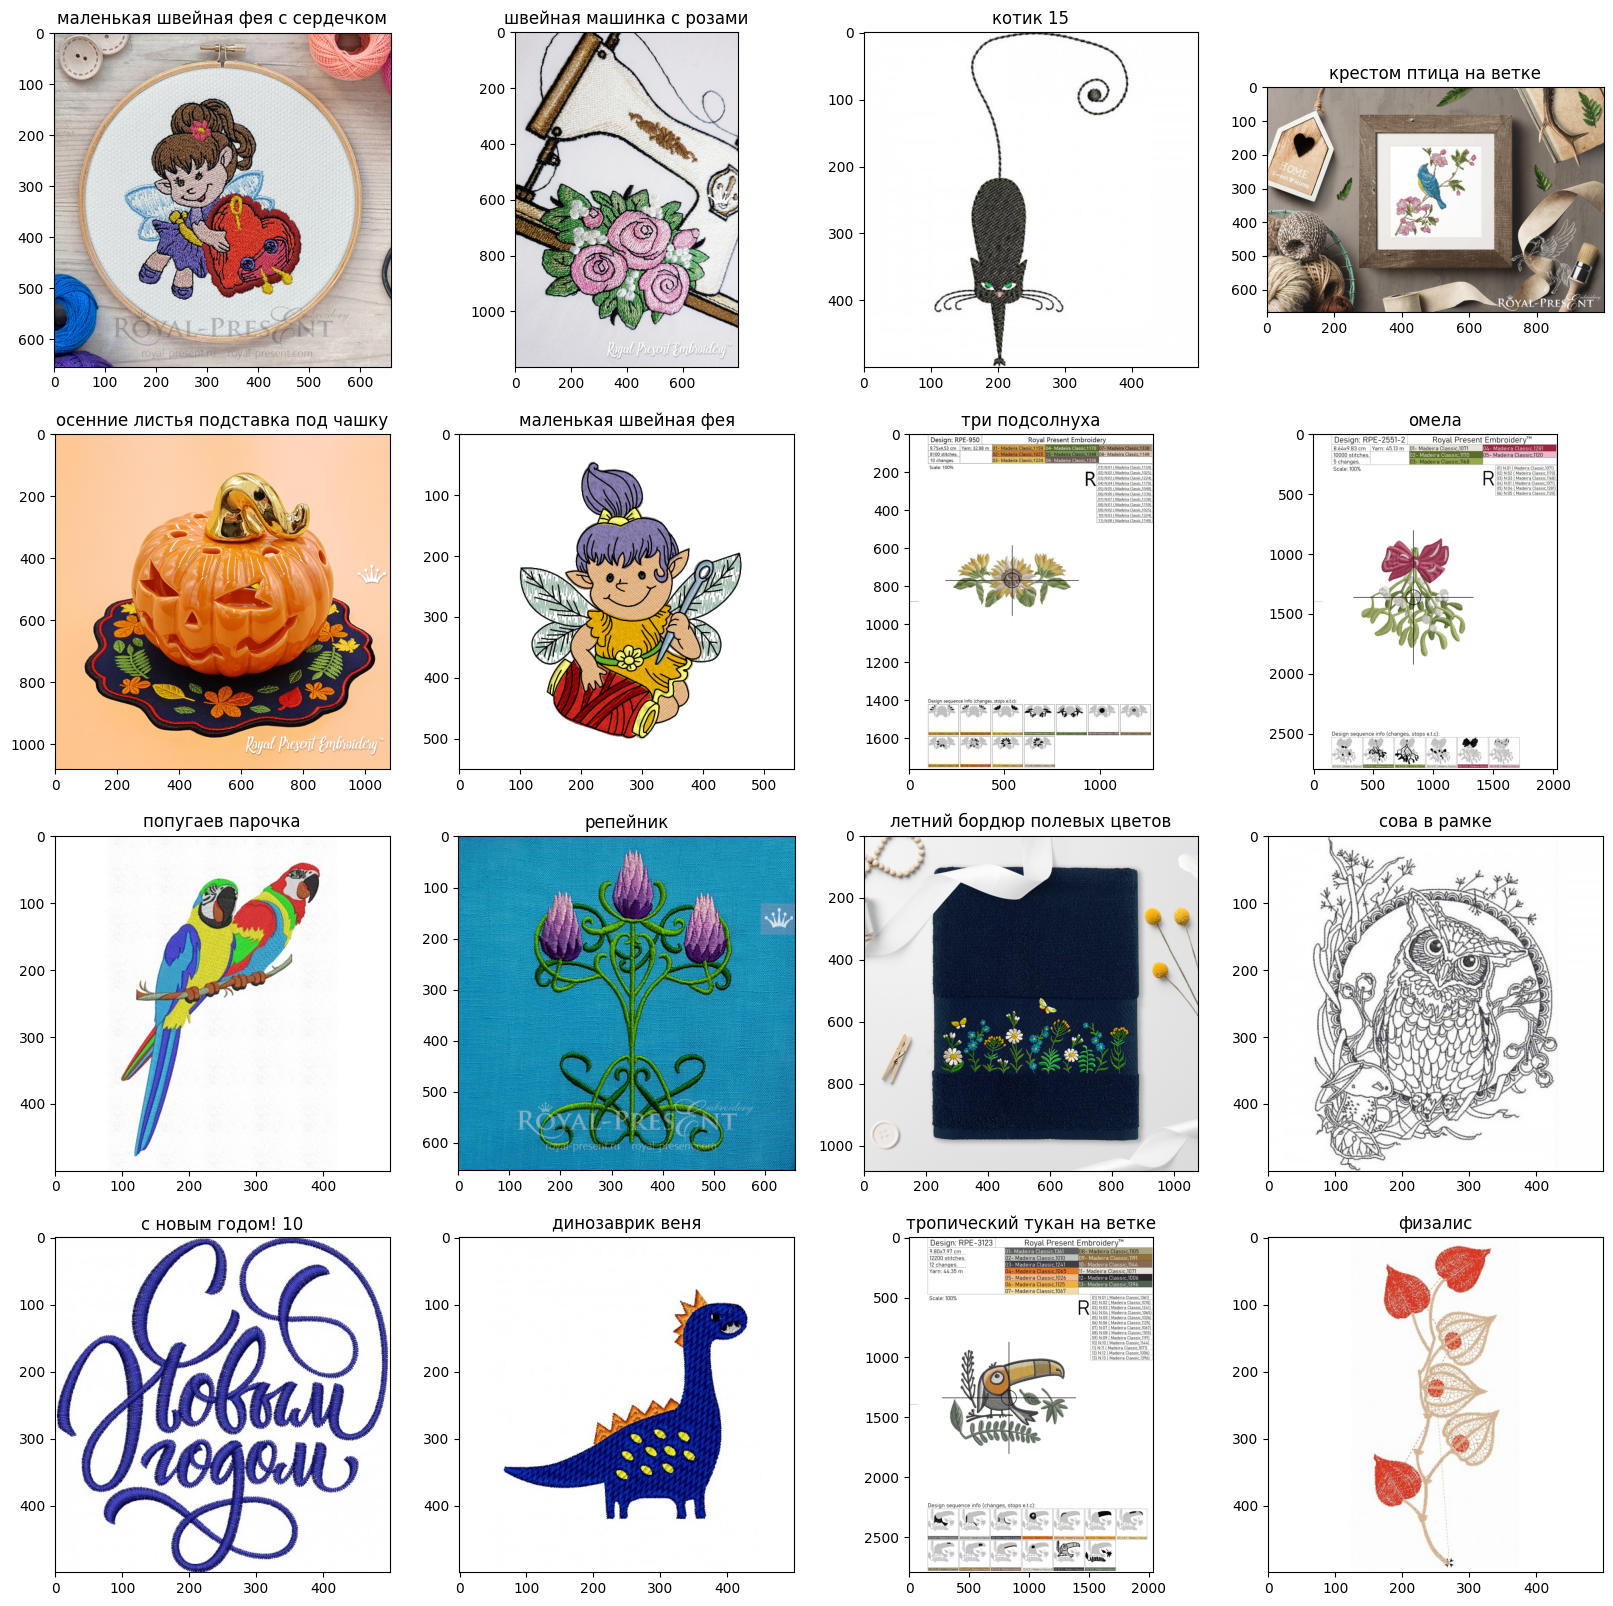

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax in axes.flatten():
    idx = np.random.randint(len(df))
    image_path = df['local_image_path'][idx]
    image = np.asarray(Image.open(image_path).convert('RGB'))
    name = df['name'][idx]

    ax.imshow(image)
    ax.set_title(name)

fig.savefig('figures/data_examples.png')